# Data Preprocessing - Normalizations

import packages

In [1]:
import json
import pandas as pd
from skimage import io
from skimage.draw import polygon_perimeter
import h5py
import numpy as np
from os import listdir
import matplotlib.pyplot as plt 
%cd ..

/Users/chen_bowen/Data Science/Udacity Courses/machine_learning_engineer/Capstone/outfit_completion_recommendation_system


In [2]:
with open('data/external/fashion.json') as json_file:
    fashion_product_scene_mapping = [json.loads(line) for line in json_file]

### visualize bounding boxes in the scene

Plot image and bounding boxes

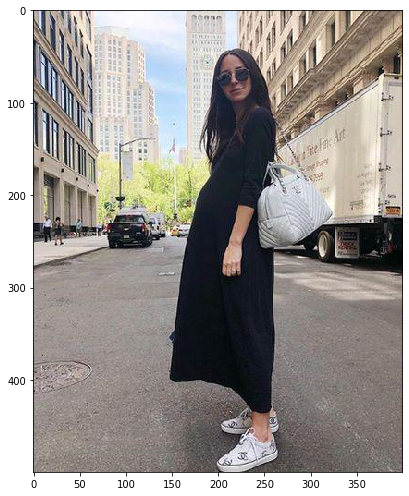

In [3]:
plt.figure(figsize=(10, 7))
images_list = listdir("data/raw/fashion_scene/")
io.imshow(io.imread("data/raw/fashion_scene/" + images_list[100]))

In [33]:
bbox = [i for i in fashion_product_scene_mapping if i["scene"]==images_list[100][:-4]][3]['bbox']
product = [i for i in fashion_product_scene_mapping if i["scene"]==images_list[100][:-4]][3]['product']

In [34]:
[i for i in fashion_product_scene_mapping if i["scene"]==images_list[100][:-4]]

[{'product': 'aa73607685427ff3b409dc7e34b925be',
  'scene': 'c27fec7b1736d2dda3c4c3beab867bd2',
  'bbox': [0.570588, 0.29496, 0.84629, 0.548025]},
 {'product': '80f80ac1d9d261ca52e7f7d37729cb52',
  'scene': 'c27fec7b1736d2dda3c4c3beab867bd2',
  'bbox': [0.490868, 0.122263, 0.609589, 0.167883]},
 {'product': '2c864946b304ad2e8bdd32ff80fcb40e',
  'scene': 'c27fec7b1736d2dda3c4c3beab867bd2',
  'bbox': [0.493151, 0.861314, 0.664384, 1.0]},
 {'product': 'c0a8f0e270968f69c6044863b6a082fb',
  'scene': 'c27fec7b1736d2dda3c4c3beab867bd2',
  'bbox': [0.570588, 0.29496, 0.84629, 0.548025]}]

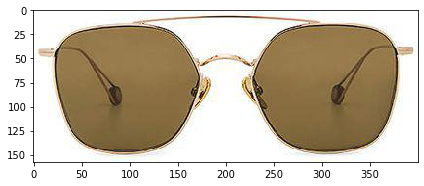

In [35]:
io.imshow(io.imread("data/raw/fashion_product/" + product + ".jpg"))

In [36]:
image = io.imread("data/raw/fashion_scene/" + images_list[100])
h, w, _ = image.shape
left, top, right, bottom = bbox
left = w * left 
top = w * top 
right = w * right 
bottom = w * bottom

In [37]:
left, top, right, bottom

(228.2352, 117.984, 338.516, 219.20999999999998)

In [9]:
h, w

(500, 400)

**Cut until a certain side**

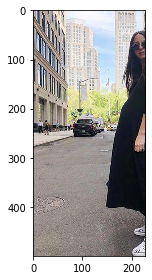

In [10]:
io.imshow(image[:, :round(left), :])

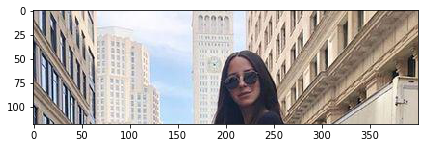

In [11]:
io.imshow(image[:round(top), :, :])

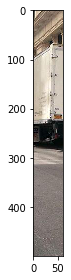

In [12]:
io.imshow(image[:, round(right):, :])

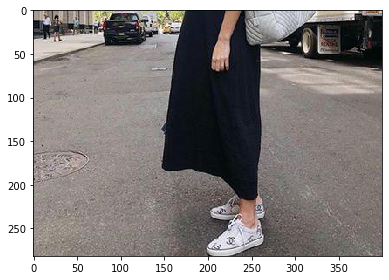

In [13]:
io.imshow(image[round(bottom)-1:, :, :])

**calculate areas of the resulting cut**

In [14]:
np.product(image[:, :round(left), :].shape)

342000

In [15]:
np.product(image[:round(top), :, :].shape)

141600

In [16]:
np.argmax([0, 1,2, 1,3])

4

In [17]:
import cv2

In [18]:
cv2.resize(image[round(bottom)-1:, :, :], (224, 244), interpolation).shape

NameError: name 'interpolation' is not defined